
## **Install Libraries, Load Data and Model**



In [2]:
!pip install shap
!pip install deepchecks alibi alibi[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.7 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=847

In [37]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import shap
import pickle

In [5]:
filename = '../Output/xgboost_model_iteration2.pkl'

# # Load the model from the file
final_model = pickle.load(open(filename, 'rb'))


# Save the testing data to a file
filename = '../Output/testing_data_iteration2.pkl'
with open(filename, 'rb') as file:
    test_x, test_y = pickle.load(file)

# Save the testing data to a file
filename2 = '../Output/training_data_iteration2.pkl'
with open(filename2, 'rb') as file:
    train_x, train_y= pickle.load(file)




[19:13:42] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



## **Overall Model performance**

### **Definitions:**

Here are the basic definitions of the elements in a confusion matrix:

- **True Positives (TP):** The number of positive instances that were correctly classified as positive by the model. In the context of a loan default use case, TP represents the number of loans that were predicted as default by the model, and they actually defaulted.
- **True Negatives (TN):** The number of negative instances that were correctly classified as negative by the model. In the loan default context, TN represents the number of loans that were predicted as non-default by the model, and they actually did not default.
- **False Positives (FP):** The number of negative instances that were incorrectly classified as positive by the model. In the loan default context, FP represents the number of loans that were predicted as default by the model, but they actually did not default.
- **False Negatives (FN):** The number of positive instances that were incorrectly classified as negative by the model. In the loan default context, FN represents the number of loans that were predicted as non-default by the model, but they actually defaulted.

|  | Actual Positive (Default) | Actual Negative (Non-Default) |
| --- | --- | --- |
| Predicted Positive (Default) | TP | FP |
| Predicted Negative (Non-Default) | FN | TN |


- **Accuracy**: Accuracy is a performance metric that measures the overall correctness of the model's predictions. It is calculated by dividing the sum of true positives and true negatives by the total number of instances. In the loan default context, accuracy represents the percentage of correctly classified loans, both defaults and non-defaults.

  **Accuracy = (TP + TN) / (TP + TN + FP + FN)**

- **Precision:** Precision is a metric that quantifies the model's ability to correctly identify positive instances out of all instances predicted as positive. It focuses on minimizing false positives (FP). In the loan default context, precision represents the percentage of loans predicted as defaults that actually defaulted.

  **Precision = TP / (TP + FP)**

A higher precision indicates a lower rate of false positives, which means that the model is more accurate in predicting loan defaults.

- **Recall (Sensitivity or True Positive Rate):** Recall measures the model's ability to identify positive instances out of all actual positive instances correctly. It focuses on minimizing false negatives (FN). In the loan default context, recall represents the percentage of defaulted loans that the model correctly identified.

  **Recall = TP / (TP + FN)**

A higher recall indicates a lower rate of false negatives, indicating that the model is more effective at capturing actual loan defaults.

- **F1 Score:** The F1 score is a metric that combines both precision and recall to provide a balanced evaluation of the model's performance in predicting loan defaults. It is calculated as the harmonic mean of precision and recall, taking into account both false positives and false negatives.
    
In the loan default use case, the F1 score is particularly valuable when there is an imbalance between the two classes (defaults and non-defaults). By considering both precision and recall, the F1 score offers a comprehensive assessment of the model's ability to predict both default and non-default loans accurately.
    

  **F1 Score = 2 * (Precision * Recall) / (Precision + Recall)**

In [10]:
from sklearn.metrics import classification_report, confusion_matrix


# Make predictions on the test data
y_pred = final_model.predict(test_x)

# Print classification metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79     25937
           1       0.81      0.75      0.78     26165

    accuracy                           0.79     52102
   macro avg       0.79      0.79      0.79     52102
weighted avg       0.79      0.79      0.79     52102

Confusion Matrix:
[[21453  4484]
 [ 6630 19535]]


### **Interpretation for the Business Stakeholders and Regulators**

|  | Actual Positive (Default) | Actual Negative (Non-Default) |
| --- | --- | --- |
| Predicted Positive (Default) | TP | FP |
| Predicted Negative (Non-Default) | FN | TN |



|  | Actual Default | Actual Non-Default |
| --- | --- | --- |
| Predicted Default | 21453 | 4484 |
| Predicted Non-Default | 6630 | 19535 |

**False Positives (FP):** False positives occur when the model predicts a loan as default, but it actually is a non-default. In the given confusion matrix, the FP value is 4,484. False positives can have the following impacts:

- If the model generates a high number of false positives due to biases, it may incorrectly classify deserving borrowers as high-risk or default-prone. Biases in the data or model can disproportionately affect certain groups, leading to the denial of loans to individuals who are actually creditworthy. This not only hampers opportunities for those individuals but also results in missed business opportunities for the lending institution.
- False positives can also result in customer dissatisfaction and harm the reputation of the lending institution. Applicants who are wrongly classified as default risks may feel unfairly treated, leading to loss of trust and potential business for the institution.
- Processing loan applications that are eventually rejected due to false positives can impose additional operational costs on the lending institution, impacting efficiency and profitability.

**False Negatives (FN):** False negatives occur when the model predicts a loan as non-default, but it actually is a default. In the given confusion matrix, the FN value is 6,630. False negatives can have the following impacts:

- If the model generates a high number of false negatives, it may grant loans to borrowers who are likely to default. This can result in increased loan defaults and financial losses for the lending institution.
- Granting loans to borrowers who are likely to default can raise concerns from regulatory bodies, potentially leading to penalties, legal issues, or damage to the reputation of the lending institution.

**To illustrate the impact, let's consider some hypothetical values for the cost of loss:**

- Cost of FP: 10,000 (Let's assume that the average amount of loan given to the customer is more than 10,000 and a lending institution will lose 10,000 on average if someone doesn’t default. This is the cost associated with incorrectly classifying a loan as default)
- Cost of FN: 50,000 (Let's assume that the average amount of loan given to the customer is more than 50,000, and a lending institution will lose 50,000 on average if someone default. This is the cost associated with incorrectly classifying a loan as non-default)

Using these values, we can calculate the total cost of errors based on the confusion matrix:

Total Cost = (FP * Cost of FP) + (FN * Cost of FN)

Total Cost = (4484 * 10000) + (6630 * 50,000)

Total Cost = 376.34 million

The total cost of errors depends on the specific cost values assigned to FP and FN and can help assess the financial impact of misclassifications in the loan default use case. By adjusting the cost values, organizations can prioritize minimizing the type of error that incurs higher financial losses and optimize their model accordingly.

### **Interpretation of Data Scientists**




In this section, we will learn how to use confusion metrics, precision, recall, and other concepts to explain to fellow data scientists how to improve the machine learning model.

**Confusion matrix:**

|  | Actual Default | Actual Non-Default |
| --- | --- | --- |
| Predicted Default | TP | FP |
| Predicted Non-Default | FN | TN |

|  | Actual Default | Actual Non-Default |
| --- | --- | --- |
| Predicted Default | 21453 | 4484 |
| Predicted Non-Default | 6630 | 19535 |

Based on the confusion matrix above, our precisions, recall and f1 scores are,

**Recall for default = TP / (TP + FN)**

**Precision =** **TP / (TP + FP)**

**F1 Score =** **2 * (Precision * Recall) / (Precision + Recall)**

|  | Precision | Recall | F1-Score |
| --- | --- | --- | --- |
| Default (1) | TP / (TP + FP) | TN / (TN + FP) | 0.79 |
| Non-Default (0) | TN/ (TN + FN) | TP / (TP + FN) | 0.78 |

|  | Precision | Recall | F1-Score |
| --- | --- | --- | --- |
| Default (1) | 0.81 | 0.75 | 0.78 |
| Non-Default (0) | 0.76 | 0.83 | 0.79 |

**Recall for Non-Default (0) = 21453 / (21453 + 4484) = 0.83**

**Recall for Default (1) = 19535 / (19535 + 6630) = 0.75**

In the previous section, we established

1. The cost of giving a loan to potential defaulters is 50,000 * 6630 = 331.5 million. This cost represents the potential loss incurred when loans are granted to individuals who are likely to default.
2. The cost of not giving the loan to non-defaulters is 10,000 * 4484 = 44.84 million. This cost represents missed business opportunities and potential revenue when loans are denied to individuals who would not default.
3. Considering the higher cost associated with giving loans to potential defaulters, it becomes a priority for data scientists to tune the model to reduce false negatives. This implies that the focus should be on improving both precision and recall for non-defaulters.
4. We can tell the data scientists that we have to reduce FN to increase the precision and recall for non-defaulters.
5. Data Scientists may explore various approaches, such as fine-tuning the model, optimizing feature selection, or incorporating additional relevant data sources.
6. Ultimately, the goal is to strike a balance between minimizing the risk of default by accurately identifying potential defaulters while avoiding unnecessary loan denials to creditworthy individuals. This strategy can help mitigate losses and ensure responsible lending practices, benefiting both the lending institution and its customers.

## **DeepChecks to find segments where ML model doesn't work**

In the previous section, we discussed the following points:

1. False positives are the individuals who deserve the loan but were incorrectly classified as defaulters. We calculated the cost of denying the loan to them as 44.84 million. It is important to minimize false positives to avoid denying loans to deserving individuals.
2. Denying loans to deserving individuals raises concerns about potential bias in the model. We need to ensure that the model is not biased against certain groups based on factors such as gender or age. Compliance with regulations requires fair lending practices.
3. False negatives are the individuals who do not deserve the loan but were incorrectly classified as non-defaulters by the model. We calculated the cost of giving loans to potential defaulters as $331.5 million. Business stakeholders are particularly concerned about false negatives and aim to reduce them to improve return on investment (ROI).
4. To achieve high ROI, it is crucial to understand how the team can effectively reduce false negatives. By minimizing false negatives, the business can identify more potential defaulters and make informed lending decisions.
5.  Apart from ROI considerations, maintaining low false negatives is necessary to comply with lending regulations. Ensuring fair and accurate loan decisions is essential for meeting regulatory requirements.

###**DeepChecks On False Positives**

Let’s use DeepChecks to understand false positives in detail and the steps get false positives from the dataset:

- Filter out rows with false positive outcome.
- Utilize the DeepChecks library to analyze and Identify weak segments within the false positive segment.
- Utilize the identified weak segments to validate or invalidate any assumptions about biases in the model and assess whether the model exhibits biases against specific groups or segments within the false positive segment. Explore the data and examine potential factors, such as gender or age, to determine if biases exist and take appropriate actions to address them.


**Conclusion:**

Based on the DeepChecks analysis of false positives, we can draw the following conclusions:

1. The examination of weak segments within the false positives indicates that the misclassifications are not influenced by factors such as age and gender. This suggests that the model is not biased based on these attributes.
2.  The weak segments contributing to false positives are related to the features "Received Principal vs Amount," "Received Principal vs Work Experience," and "Received Principal." These features are responsible for the model's misclassifications but do not involve any attributes that could justify the presence of bias.

In [11]:
def filter_test_data_based_actual_prediction(test_x, test_y,y_pred, actual=1, prediction=0  ):

  ## Filter False negatives

  # Assuming you have a DataFrame called df and a numpy array called y_pred

  # Convert the numpy array to a pandas Series
  Predictions = pd.Series(y_pred, name='Predictions')

  # Merge the Series with the DataFrame
  merged_df = pd.concat([test_y, Predictions], axis=1)


  filtered_df = merged_df[(merged_df['Actual'] == actual) & (merged_df['Predictions'] == prediction)]


  # Assuming you have the 'test_x' DataFrame and 'filtered_df' DataFrame already defined

  # Get the index of the filtered_df
  filtered_index = filtered_df.index

  # Filter the test_x DataFrame based on the same index
  filtered_test_x = test_x.loc[filtered_index]

  # Concatenate test_x and filtered_df along the columns axis
  concatenated_df = pd.concat([filtered_test_x, filtered_df], axis=1)

  # Assuming you have a DataFrame called 'data' and want to extract the column 'column_name'

  # Split the data into features (X) and labels (y)
  test_x_FN = concatenated_df.drop(['Predictions', 'Actual'], axis=1)  # Features (all columns except 'column_name')
  test_y_FN = concatenated_df['Actual']  # Label column

  return test_x_FN, test_y_FN

test_x_FP, test_y_FP= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=0, prediction=1 )


In [12]:
#The check is designed to help you easily identify the model’s weakest segments in the data provided.
#In addition, it enables to provide a sublist of the Dataset’s features, thus limiting the check to search in interesting subspaces.
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import WeakSegmentsPerformance


# Create a DeepChecks Dataset from the test data
dataset = Dataset(test_x_FP, test_y_FP)
WeakSegmentsPerformance().run(dataset, final_model)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 35 categorical features were inferred.: Tenure(years), Tier of Employment, Work Experience, Dependents, Delinq_2yrs, Number of loans, amount_missing... For full list use dataset.cat_features


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Weak Segments Performance

In [13]:
# Priniting weak segments in dataframe format

result= WeakSegmentsPerformance().run(dataset, final_model)
result.value['weak_segments_list'].head(3)

,Accuracy Score,Feature1,Feature1 Range,Feature2,Feature2 Range,% of Data,Samples in Segment
0,0.000000,Received Principal,"(3137.5, 7999.9951171875)",Amount,"(-inf, -500.0)",8.59,"[42265, 38626, 47729, 44821, 39942, 39006, 422..."
1,0.175610,Received Principal,"(-inf, 3137.5)",,None,5.07,"[29425, 21006, 19007, 954, 48251, 20810, 49514..."
2,0.237624,Received Principal,"(-inf, 7999.9951171875)",Interest Rate,"(11.394999980926514, 12.834999561309814)",5.00,"[34548, 29057, 29425, 44821, 21006, 16150, 412..."


### **DeepChecks on False Negatives**

Let’s use DeepChecks to understand false negatives in detail.

**Conclusion:**

Based on the DeepChecks analysis of false negatives, we can draw the following conclusions:

1. The weak segments identified as "Received Principal vs Amount," "Received Principal vs Work Experience," and "Received Principal" are crucial factors related to the use case of loan defaults. We can focus on building a new model specifically designed to cater to these segments.
2. We can further investigate the relationships between the received principal, amount, work experience, and other relevant features. This exploration may reveal opportunities for creating new features or transforming existing ones.

In [25]:
test_x_FN, test_y_FN= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=1, prediction=0 )

In [15]:
#The check is designed to help you easily identify the model’s weakest segments in the data provided.
#In addition, it enables to provide a sublist of the Dataset’s features, thus limiting the check to search in interesting subspaces.
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import WeakSegmentsPerformance


# Create a DeepChecks Dataset from the test data
dataset = Dataset(test_x_FN, test_y_FN)
WeakSegmentsPerformance().run(dataset, final_model)


deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 35 categorical features were inferred.: Tenure(years), Tier of Employment, Work Experience, Dependents, Delinq_2yrs, Number of loans, amount_missing... For full list use dataset.cat_features


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Weak Segments Performance

## **Global-level explaination using SHAP**

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high Principal Received lowers the predicted default probability.

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



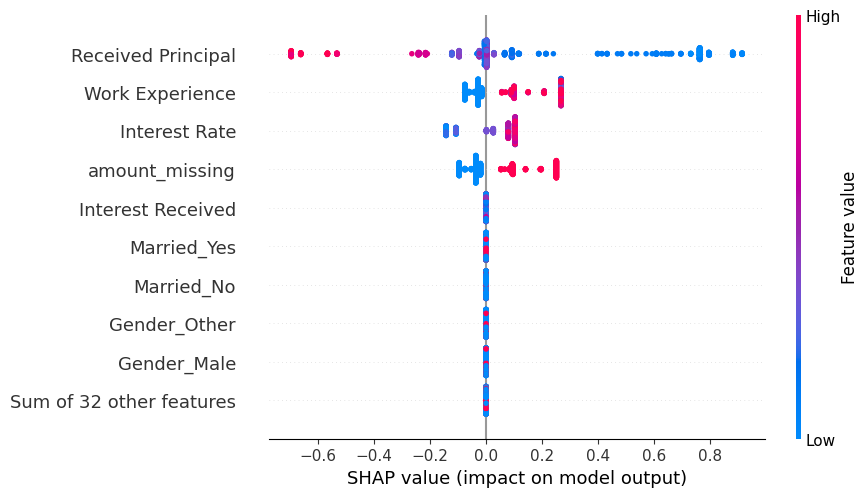

In [38]:
# Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the testing data

dmatrix_test = xgb.DMatrix(test_x, enable_categorical=True) # Optional. Use if you have categorical data in processed data

shap_values = explainer(test_x_FN)

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)
# shap.plots.bar(shap_values)

**Key Insights for Data Scientists, Business Stakeholders and Regulators**

**1. Data Scientists:**
For data scientists, understanding the importance of features is crucial for model development, feature selection, and model interpretation. A feature importance graph provides insights into the relative importance of different input variables or features in predicting the target variable (creditworthiness in this case).

Feature importance can be determined using various techniques such as permutation importance, feature importance from tree-based models (e.g., Random Forest or Gradient Boosting), or coefficients from linear models (e.g., logistic regression). The importance is typically represented as a graph, where the features are ranked based on their relevance.

By analyzing the feature importance graph, data scientists can gain several benefits:

- **Model Development:** Feature importance helps identify the most influential features, allowing data scientists to focus on the critical aspects of the credit lending decision process. This knowledge can guide feature engineering efforts and enhance the model's predictive performance.

- **Feature Selection:** Understanding feature importance aids in selecting the most relevant and informative features. By eliminating less important or redundant features, data scientists can simplify the model, reduce computational complexity, and potentially improve interpretability.

- **Model Interpretation:** Feature importance provides insights into the underlying factors driving the model's predictions. Data scientists can explain to stakeholders the rationale behind the model's decision-making process by highlighting the key features that contribute significantly to the creditworthiness assessment.

**2. Business Stakeholders:**
Business stakeholders, such as credit risk managers or product managers, are interested in understanding the factors that influence credit lending decisions. A feature importance graph helps them grasp the key drivers of creditworthiness assessments made by the model.
By reviewing the feature importance graph, business stakeholders can:

- **Gain Insights:** Understanding which features have the most significant impact on creditworthiness allows stakeholders to gain insights into the decision-making process. They can identify the critical factors contributing to positive or negative credit assessments, enabling them to align their business strategies accordingly.
- **Risk Management:** Feature importance helps stakeholders identify and monitor high-risk features that may have a strong impact on default rates or credit losses. This information allows them to develop risk mitigation strategies, adjust lending criteria, or implement targeted interventions to minimize potential risks.

**3. Regulators:**
Regulators are concerned with ensuring fairness and transparency in credit lending practices. When explaining the feature importance graph to regulators, it's important to highlight that the model's decision-making process is not based on discriminatory or biased features.
To address regulators' concerns, you can:

- **Highlight Non-Discriminatory Features:** By presenting the feature importance graph, you can emphasize that the model assigns importance based on the predictive power of features, rather than sensitive attributes such as race, gender, or ethnicity. This demonstrates that the model's decision-making is aligned with fair lending practices.
- **Transparency:** The feature importance graph provides regulators with visibility into the factors influencing the credit lending decisions. This transparency helps regulators assess the model's fairness, identify potential biases, and ensure compliance with regulatory requirements.

We can also use SHAP to understand how the machine learning model behaves in different scenarios. Previously we disucsssed how important it is for us to understand False Positives and False Negatives. By running SHAP on False Positives and Negatives datasets, we can see most important features and how they impact the output of the model.

### SHAP on False Positives

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



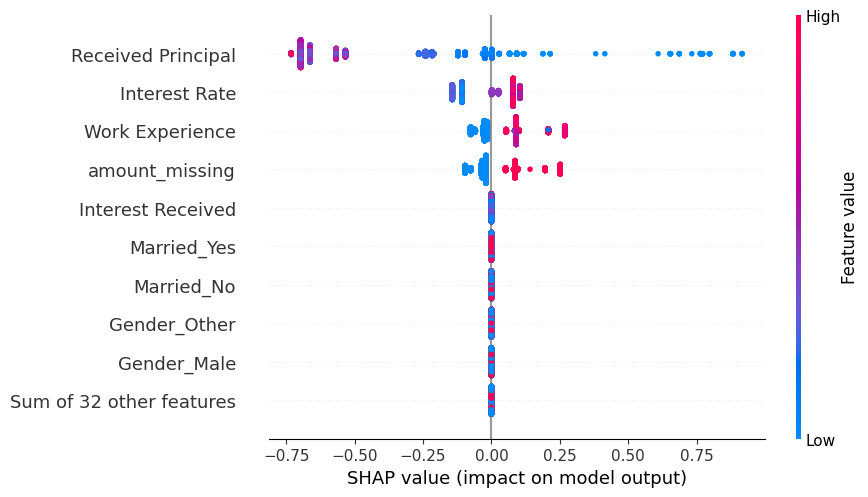

In [44]:
# Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the testing data

dmatrix_test = xgb.DMatrix(test_x_FP, enable_categorical=True) # Optional. Use if you have categorical data in processed data

shap_values = explainer(test_x_FP)

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)
# shap.plots.bar(shap_values)

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Check out the feature dependence plot below.

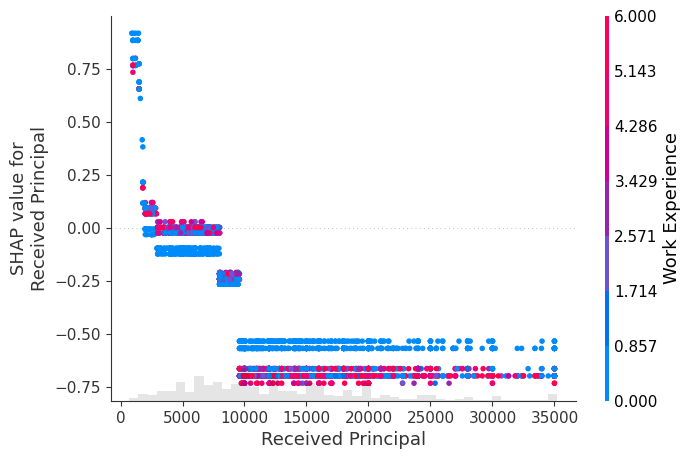

In [46]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Received Principal"], color=shap_values)

We can see above that SHAP value (impact on the model output) decreases with the increase in the Received Principal amount.

Just to reiterate the definition of shap values, positive shap value will increase the prediction of the model and negative shap value will decrease the prediction of the model.

### SHAP on False Negatives

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



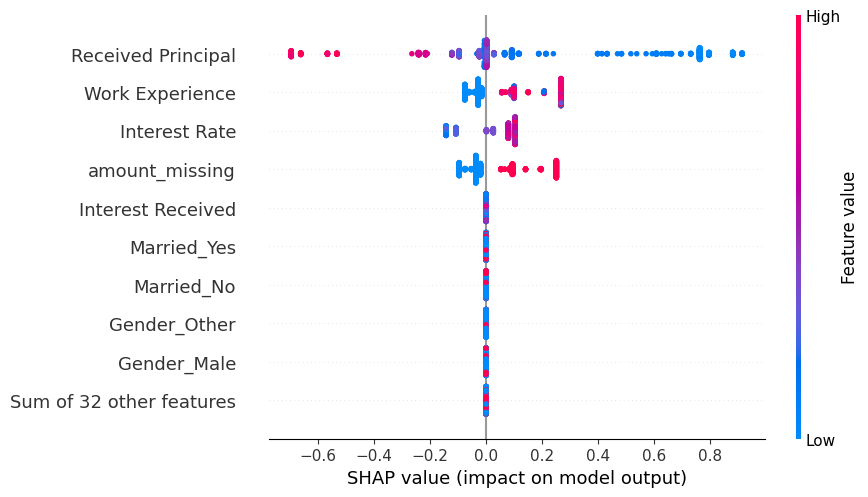

In [41]:
# Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the testing data

dmatrix_test = xgb.DMatrix(test_x_FN, enable_categorical=True) # Optional. Use if you have categorical data in processed data

shap_values = explainer(test_x_FN)

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

We can see that work experience is more important than interest rate in False Negatives. Does this ranking of features align with understanding of the credit lending that business stakeholders and regulators have in mind? We can present them to find out.

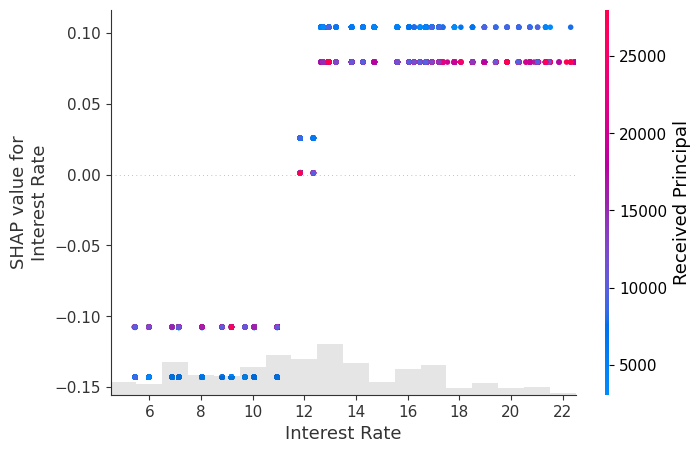

In [47]:
shap.plots.scatter(shap_values[:,"Interest Rate"], color=shap_values)


## **Explain each prediction using SHAP**

Local-level explanations provide data scientists with the ability to explain how different features contribute together to arrive at a specific prediction for an individual instance. These explanations can be valuable when communicating with business stakeholders and regulators. Here are some examples of how data scientists can use local-level explanations to explain the model:

**1. Explaining Creditworthiness Assessment to Business Stakeholders:**
Data scientists can use local-level explanations to demonstrate how the model evaluates the creditworthiness of specific individuals. For example:
- **Case 1:** Data scientists can select a sample customer and present a local-level explanation that showcases the most influential features contributing to the creditworthiness assessment. They can explain how each feature's value affects the model's prediction, allowing stakeholders to understand the factors driving the specific decision for that customer.
- **Case 2:** Data scientists can compare two customers with different creditworthiness outcomes but similar values for most features. By highlighting the specific feature(s) that differ between the two customers, they can explain how that feature influenced the divergent predictions. This helps stakeholders understand the relative importance of various factors in the creditworthiness assessment.

By providing these personalized explanations at the individual level, data scientists can help business stakeholders understand how the model arrives at its decisions, gain insights into the factors influencing creditworthiness assessments, and make informed business decisions based on the model's findings.

**2. Demonstrating Fairness and Non-Discrimination to Regulators:**
Regulators are particularly concerned with ensuring that credit lending models are fair, transparent, and non-discriminatory. Local-level explanations can assist data scientists in addressing these concerns:
- **Case 1:** Data scientists can select customers from different demographic groups (e.g., based on race, gender) and present local-level explanations to regulators. By highlighting the features that contribute to the predictions for each customer, data scientists can demonstrate that the model's decisions are not based on discriminatory attributes. This helps regulators gain confidence in the fairness of the model.
- **Case 2:** Data scientists can provide local-level explanations for customers who have experienced adverse outcomes, such as being denied credit or receiving unfavorable terms. By analyzing the influential features for these customers, data scientists can identify any potential biases or disparities in the model's decision-making. They can then explain to regulators how the model treats different customers fairly and ensure compliance with regulatory requirements.

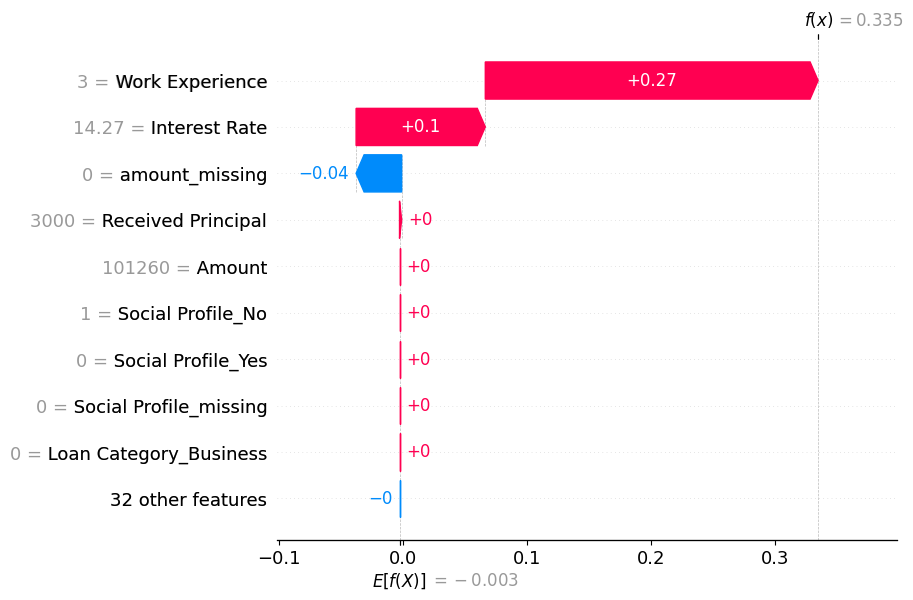

In [49]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

f(x) is the output of the model. Output of the model is close to 0 and 0 stands for 'non default'. We can see above how individual feature and it's value impacted the output of the model.

##**Explain each prediction using Anchors**

Let's first learn about Anchors

- Anchors are like rules that explain how a model makes predictions. They tell us which features of an instance should be kept the same to get a specific prediction.
- An anchor can have a single rule, which is called a predicate. It can also have multiple rules, which are connected by "AND".
- Anchors are in the form of ‘IF-THEN’. Multiple rules will be separated by ‘AND’. In our example, the anchor consists of two rules: **“**If the **person is female** AND **belongs to the first class**, THEN **predict that they survived.”**
- Let’s understand the concept of coverage. By keeping the anchor features fixed and varying the other features, we can check different instances. In the Titanic example, about 15% of instances have the same anchor features (female and first class) but different other features.
- Precision means, how much our model predicted accurately out of the coverage instances. In the example, Out of those 15% instances, our model accurately predicted the survival outcome ("Survived = True") with a precision of 97%.

Here is the code to find an Anchor

In [22]:
import pandas as pd
from alibi.explainers import AnchorTabular


"""Initialize and train the anchor model"""
predict_fn = lambda x: final_model.predict_proba(x)
explainer = AnchorTabular(predict_fn, feature_names=train_x.columns)
# Fit the explainer with reference data
explainer.fit(train_x.values)

"""Find Anchor of customer at index 0"""
idx = 0 # record we would like to explain using anchors
class_names = ["No Default","Default"]

print('Prediction: ', class_names[explainer.predictor(train_x[idx:idx+1].values)[0]])

explanation = explainer.explain(train_x[idx:idx+1].values, threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


Prediction:  Default
Anchor: Received Principal <= 2038.73
Precision: 0.98
Coverage: 0.25



**1. Explaining Credit Lending Decisions to Business Stakeholders:**
Data scientists can use Anchors to provide easy-to-understand explanations for specific credit lending decisions made by the model. For example:

- **Case 1:** Let's say a customer was approved for a loan. Data scientists can use Anchors to identify the most influential features that led to the approval decision. They can create an anchor rule, such as If income is greater than X dollars and credit score is greater than Y, approve the loan. This rule highlights the key factors that contributed to the positive decision, making it easy for stakeholders to understand why the loan was approved.
- **Case 2:** Similarly, if a customer was denied credit, Anchors can help data scientists identify the decisive factors behind the denial. They can generate an anchor rule, such as If outstanding debt is greater than Rs Z or employment length is less than T years, deny the loan. This rule clarifies the main reasons for the negative decision, enabling stakeholders to understand the factors leading to the denial.

By using Anchors, data scientists can provide concise and interpretable explanations for individual credit lending decisions. These explanations empower stakeholders to grasp the rationale behind the model's predictions and make informed business decisions.



In [23]:
"""Initialize Anchor instance and train the model"""
import pandas as pd
from alibi.explainers import AnchorTabular


predict_fn = lambda x: final_model.predict_proba(x)

explainer = AnchorTabular(predict_fn, feature_names=test_x_FP.columns)

# Fit the explainer with reference data
explainer.fit(test_x.values)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)},
  'version': '0.9.4'}
)

In [26]:
"""case 1 : actual=0 and prediction=0"""

test_x_TP, test_y_TP= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=0, prediction=0 )

idx = 2 # record we would like to explain using anchors
class_names = ["No Default","Default"]

print('Prediction: ', class_names[explainer.predictor(test_x_TP[idx:idx+1].values)[0]])

explanation = explainer.explain(test_x_TP[idx:idx+1].values, threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


Prediction:  No Default
Anchor: Received Principal > 8512.08
Precision: 1.00
Coverage: 0.25


In [27]:
"""case 2 : Loan denied: actual=1 and prediction=1"""

test_x_TN, test_y_TN= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=1, prediction=1 )

idx = 2 # record we would like to explain using anchors
class_names = ["No Default","Default"]

print('Prediction: ', class_names[explainer.predictor(test_x_TN[idx:idx+1].values)[0]])

explanation = explainer.explain(test_x_TN[idx:idx+1].values, threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


Prediction:  Default
Anchor: Work Experience > 0.00 AND Received Principal <= 8512.08
Precision: 0.98
Coverage: 0.13


**2. Addressing Fairness and Transparency Concerns of Regulators:**
Regulators are often concerned with ensuring fairness, transparency, and non-discrimination in credit lending models. Anchors can assist data scientists in addressing these concerns effectively:

- **Case 1:** Data scientists can use Anchors to generate rules that highlight fair lending practices. For instance, they can create an anchor rule, such as "Approve the loan if race is not a discriminatory factor, income is above a certain threshold, and employment length is within an acceptable range." This rule demonstrates that the model's decisions are not influenced by race and align with fair lending regulations.

- **Case 2:** Data scientists can use Anchors to identify any potential biases in the model's decision-making process. They can create anchor rules that explicitly state sensitive attributes (e.g., race, gender) as irrelevant for the decision. By demonstrating that the model's predictions do not rely on discriminatory factors, data scientists can address regulators' concerns about fairness and non-discrimination.

By leveraging Anchors, data scientists can provide regulators with transparent and interpretable explanations for the model's credit lending decisions. These explanations demonstrate adherence to fair lending practices, showcase the model's transparency, and assure regulators of compliance with regulatory requirements.

## **Explain each prediction using Counterfactuals**

A counterfactual explanation describes a causal situation in the form: “If X had not occurred, Y would not have occurred”. For example: “If I hadn’t taken a sip of this hot coffee, I wouldn’t have burned my tongue”. Event Y is that I burned my tongue; cause X is that I had a hot coffee. Thinking in counterfactuals requires imagining a hypothetical reality that contradicts the observed facts (for example, a world in which I have not drunk the hot coffee), hence the name “counterfactual”. The ability to think in counterfactuals makes us humans so smart compared to other animals.

**1. Explaining Model Decisions to Business Stakeholders:**
Data scientists can use Counterfactuals to demonstrate how the model's decisions would change if certain features were different. This helps stakeholders understand the robustness and effectiveness of the model's decision-making process. For example:

- **Case 1:** Let's consider a customer who was denied credit. Data scientists can generate Counterfactuals by altering the values of specific features that contributed to the denial. By showing how the decision would change if those features were different (within realistic bounds), data scientists can provide insights into the factors that influence creditworthiness and explain the model's decision to stakeholders.
- **Case 2:** Similarly, if a customer was approved for credit, data scientists can generate Counterfactuals to illustrate the critical factors that led to the positive decision. By demonstrating how altering those features would impact the decision, data scientists can highlight the model's key drivers and reinforce stakeholders' understanding of the decision-making process.

By using Counterfactuals, data scientists can provide concrete and interpretable explanations that showcase the model's decision-making capabilities and how it responds to different scenarios.

**2. Demonstrating Fairness and Compliance to Regulators:**
Regulators are interested in ensuring that credit lending models are fair, transparent, and comply with regulatory requirements. Data scientists can use Counterfactuals to address these concerns:

- **Case 1:** Data scientists can generate Counterfactuals for individuals wo got their loans denied. There is gender bias, if counterfactuals says that by changing gender from male to female, you can get the loan approved. By showing that model isn't changing decisions based on senstive features, data scientists can win over regulators.

By employing Counterfactuals, data scientists can provide regulators with concrete and interpretable evidence of the model's fairness, transparency, and compliance with regulatory guidelines. These explanations help build trust and confidence in the model's performance and decision-making capabilities.

In [30]:
import tensorflow as tf
tf.get_logger().setLevel(40) # suppress deprecation messages
tf.compat.v1.disable_v2_behavior() # disable TF2 behaviour as alibi code still relies on␣
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from alibi.explainers import CounterfactualProto
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

In [31]:
"""Data Preprocessing and model building"""

#Reading Data
data=pd.read_excel(r'/content/drive/MyDrive/_explainable_ai/Input/Cleaned&SampledData.xlsx')

# Assuming `target_column` is the name of the target variable column
target_column="Defaulter"
X = data.drop(target_column, axis=1)
y = data[target_column]

#List of all features
feature_names = X.columns.tolist()

# Convert X to a NumPy array
X = X.to_numpy()

# Convert y to a NumPy array
y = y.to_numpy()

# Standardize data
mu = X.mean(axis=0)
sigma = X.std(axis=0)
X = (X - mu) / sigma

# Split data into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the final RF model with the best hyperparameters
final_model1 = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    n_estimators=100,
     # Use GPU for faster training (if available)
)

final_model1.fit(x_train, y_train)  # Train the final model on the entire dataset


# Save the trained model using pickle for future use
with open('loan.pkl', 'wb') as file:
    pickle.dump(final_model1, file)


# Open the pickle file in read mode
with open('loan.pkl', 'rb') as file:
    # Load the saved model from the pickle file
    final_model1 = pickle.load(file)

# Use the loaded model to make predictions on the test data
score = final_model1.score(x_test, y_test)

# Take a single example from the test_x data and reshape it into a 2D array
X = x_test[1].reshape((1,) + x_test[1].shape)

# Retrieve the shape of the reshaped array
shape = X.shape

In [32]:
"""Building a Counterfactual Model"""

# The model is assumed to be already defined and stored in the variable `final_model1`

# Initialize the explainer and specify the predict function
# The predict function takes an input `x` and returns the predicted class probabilities
predict_fn = lambda x: final_model1.predict_proba(x)

# Create the counterfactual explainer object
# The `CounterfactualProto` class is used for counterfactual explanations
# It takes the predict function, shape of the input, and other parameters
cf = CounterfactualProto(predict_fn, shape, use_kdtree=True, theta=10., max_iterations=1000,
                         feature_range=(x_train.min(axis=0), x_train.max(axis=0)),
                         c_init=1., c_steps=10)

# Fit the explainer to the training data
cf.fit(x_train)

CounterfactualProto(meta={
  'name': 'CounterfactualProto',
  'type': ['blackbox', 'tensorflow', 'keras'],
  'explanations': ['local'],
  'params': {
              'kappa': 0.0,
              'beta': 0.1,
              'gamma': 0.0,
              'theta': 10.0,
              'cat_vars': None,
              'ohe': False,
              'use_kdtree': True,
              'learning_rate_init': 0.01,
              'max_iterations': 1000,
              'c_init': 1.0,
              'c_steps': 10,
              'eps': (0.001, 0.001),
              'clip': (-1000.0, 1000.0),
              'update_num_grad': 1,
              'write_dir': None,
              'feature_range': (array([-0.66780218, -1.87626245, -0.6204565 , -1.81516863, -0.46770716,
       -1.33082588, -1.41484468, -0.34268247, -1.16841744, -1.00779207,
       -0.9357944 , -0.05302204, -0.64750285, -0.70826748, -0.70135535,
       -0.71171059, -0.70540964, -0.70604438, -0.70986907, -0.92478053,
       -0.01988813, -0.02217181, -0.315

### **Case 1: Loan Denied**

In [33]:
idx= 0
# Take a single example from the test_x data and reshape it into a 2D array
X = x_test[idx].reshape((1,) + x_test[idx].shape)

# Generate a counterfactual explanation for the input example X
explanation = cf.explain(X)

print(f'Original prediction: {explanation.orig_class}')
print(f'Counterfactual prediction: {explanation.cf["class"]}')

Original prediction: 1
Counterfactual prediction: 0


Let’s take a look at the counterfactual. To make the results more interpretable, we will first undo the pre-processing step and then check where the counterfactual differs from the original instance

In [34]:
# Calculate the original input
orig = X * sigma + mu

# Calculate the counterfactual input based on the explanation
counterfactual = explanation.cf['X'] * sigma + mu

# Calculate the difference between the counterfactual and original inputs
delta = counterfactual - orig

# Iterate through the features and print differences that exceed a threshold
for i, f in enumerate(feature_names):
    # Check if the absolute difference exceeds a threshold (1e-4 in this case)
    if np.abs(delta[0][i]) > 1e-4:
        # Print the feature name and its corresponding difference value
        print(f'{f}: {delta[0][i]}')


Amount: 0.0005778822014690377
Work Experience: -0.6038058936007753
Total Income(PA): -8846.288746725157
Total Payement : -217.99855404263872
Received Principal: -0.00013252565258881077
Interest Received: -100.61316015633201



So in order for the loan to approved, the Amount should be increased by 2519.72, Total Income(PA) should be decreased by 5126.490660387935, and Interest Received should be decreased by 1557.717473345905.

### **Case 2: Loan Approved**

In [36]:
# Loan approved data
idx= -2
# Take a single example from the test_x data and reshape it into a 2D array
X = x_test[idx].reshape((1,) + x_test[idx].shape)

# Generate a counterfactual explanation for the input example X
explanation = cf.explain(X)

print(f'Original prediction: {explanation.orig_class}')
print(f'Counterfactual prediction: {explanation.cf["class"]}')


# Calculate the original input
orig = X * sigma + mu

# Calculate the counterfactual input based on the explanation
counterfactual = explanation.cf['X'] * sigma + mu

# Calculate the difference between the counterfactual and original inputs
delta = counterfactual - orig

# Iterate through the features and print differences that exceed a threshold
for i, f in enumerate(feature_names):
    # Check if the absolute difference exceeds a threshold (1e-4 in this case)
    if np.abs(delta[0][i]) > 1e-4:
        # Print the feature name and its corresponding difference value
        print(f'{f}: {delta[0][i]}')

Original prediction: 0
Counterfactual prediction: 1
Amount: -0.0014244676422094926
Interest Rate: 6.234678056081108
Total Income(PA): 0.0005529195623239502
Total Payement : -0.00046543367352569476
Received Principal: 0.00011714985521393828
Interest Received: -3432.734782515745
Is_verified_Not Verified: -0.5685290476598878
Is_verified_Verified: 0.5704381878165528


So in order for the loan to be rejected, the interest rate should be increased by 6%, Interest received should be decreased by 3432, and is_verified should be true. Does this counterfactual aligns with how business stakeholders think about about credit lending? Data Scientists can ask this question to business stakeholders.

## **Bonus: Counterfactuals using Microsoft Dice for sklearn models**

In [ ]:
#install dice-ml
!pip install dice-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
import dice_ml  # Import the DiCE library
from sklearn.model_selection import train_test_split  # Import train_test_split function


# Create a copy of the training features dataset
dataset = train_x.copy()

# Add a new column called "Defaulter" to the dataset
# and assign the corresponding target labels from the training set
dataset["Defaulter"] = train_y

# Select columns from the dataset that have the data type 'uint8'
uint8_columns = dataset.select_dtypes(include='uint8').columns


# Convert the columns with the data type 'uint8' to 'int' in the dataset
dataset[uint8_columns] = dataset[uint8_columns].astype('int')


target = dataset["Defaulter"]  # Define the target variable as the "Defaulter" column

# Split the dataset into training and testing datasets
train_dataset, test_dataset, _, _ = train_test_split(dataset,
                                                     target,
                                                     test_size=0.2,
                                                     random_state=0,
                                                     stratify=target)

continuous_features = ['Amount', 'Interest Rate', 'Tenure(years)', 'Tier of Employment', 'Work Experience', 'Total Income(PA)', 'Dependents', 'Delinq_2yrs',
                       'Total Payement ', 'Received Principal', 'Interest Received', 'Number of loans', 'amount_missing', 'Gender_Female', 'Gender_Male', 'Gender_Other',
                       'Married_No', 'Married_Yes', 'Married_missing', 'Home_mortgage', 'Home_none', 'Home_other', 'Home_own', 'Home_rent', 'Social Profile_No',
                       'Social Profile_Yes', 'Social Profile_missing', 'Loan Category_Business', 'Loan Category_Car ', 'Loan Category_Consolidation', 'Loan Category_Credit Card',
                       'Loan Category_Home', 'Loan Category_Medical ', 'Loan Category_Other ', 'Employmet type_Salaried', 'Employmet type_Self - Employeed', 'Employmet type_missing',
                       'Is_verified_Not Verified', 'Is_verified_Source Verified', 'Is_verified_Verified', 'Is_verified_missing']



In [ ]:
# Create a DiCE Data object with the training dataset and specified continuous features
d = dice_ml.Data(dataframe=train_dataset,
                 continuous_features=continuous_features,
                 outcome_name='Defaulter')

# Create a DiCE Model object with the pre-trained ML model
m = dice_ml.Model(model=final_model, backend="sklearn")

# Create a DiCE explanation instance using the Data and Model objects
exp = dice_ml.Dice(d, m, method='genetic')

query_instance = test_dataset.drop(columns="Defaulter")[0:1]  # Select the first instance from the test dataset without the 'Defaulter' column as the query instance
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite")  # Generate counterfactual explanations for the query instance with a total of 4 counterfactuals, aiming for the "opposite" class
dice_exp.visualize_as_dataframe()  # Visualize the counterfactual explanations as a dataframe

100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

Query instance (original outcome : 0)


,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing,Defaulter
0,-1000.0,9.18,4.0,1.0,5.0,46675.0,1.0,0.0,13970.00293,12000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing,Defaulter
0,-1000.0,12.73,4.0,1.0,0.0,4535349.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
0,-1000.0,5.42,4.0,0.0,0.0,4800.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0,-1000.0,5.42,4.0,0.0,0.0,4800.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0,-1000.0,5.42,4.0,0.0,0.0,4800.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
